In [ ]:
# Obtenemos la variación semanal de precios de los últimos 3 años. En este conjunto de gráficos, observo una gran inestabilidad semanal de los 
# precios de todas las criptomonedas, con la excepción de Usd-Coin que muestra el respaldo de esta criptomoneda como Stablecoin y Tether. Además 
# podemos ver que esta inestabilidad se muestra en una tendencia a la baja constante en el período. 

            ethereum   bitcoin  cardano  tether     bnb  dogecoin  usd-coin  \
timestamp                                                                     
2021-08-29   3209.01  48438.40     2.77     1.0  487.97      0.29       1.0   
2021-09-05   3617.38  48782.33     2.86     1.0  481.48      0.29       1.0   
2021-09-12   3534.96  47719.18     2.61     1.0  437.20      0.27       1.0   
2021-09-19   3450.47  47147.40     2.44     1.0  415.03      0.24       1.0   
2021-09-26   3024.06  43552.54     2.21     1.0  369.70      0.22       1.0   
...              ...       ...      ...     ...     ...       ...       ...   
2023-07-30   1868.83  29385.80     0.31     1.0  240.42      0.08       1.0   
2023-08-06   1846.59  29215.08     0.30     1.0  242.44      0.08       1.0   
2023-08-13   1844.76  29402.89     0.29     1.0  242.06      0.08       1.0   
2023-08-20   1760.74  27894.21     0.27     1.0  228.56      0.07       1.0   
2023-08-27   1663.14  26228.54     0.27     1.0  214

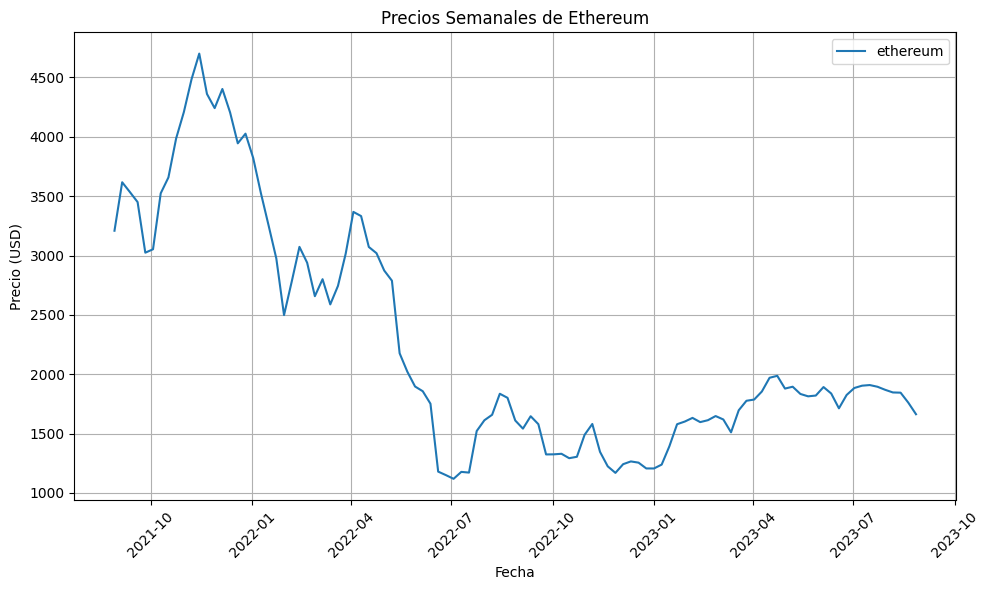

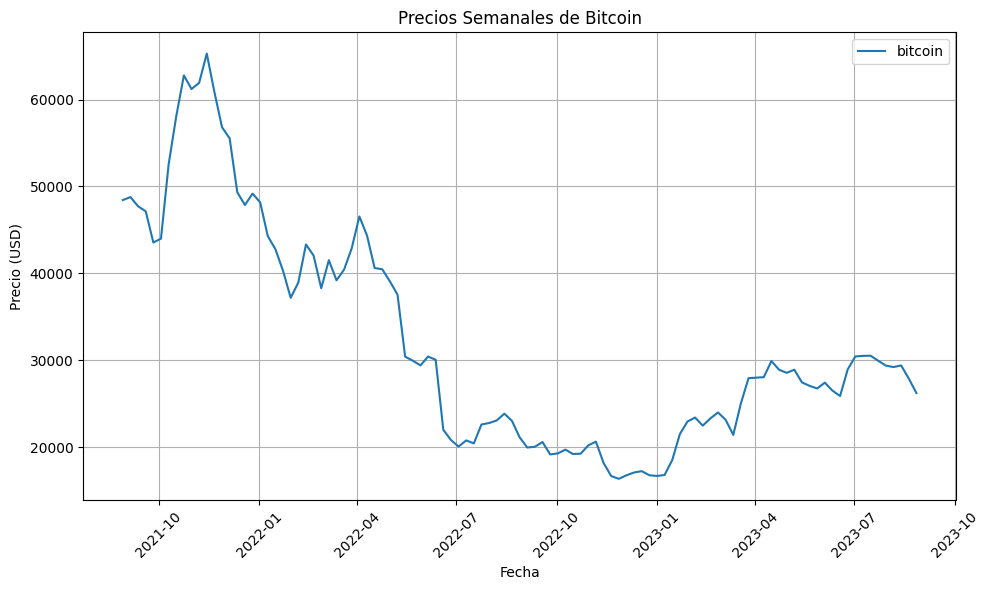

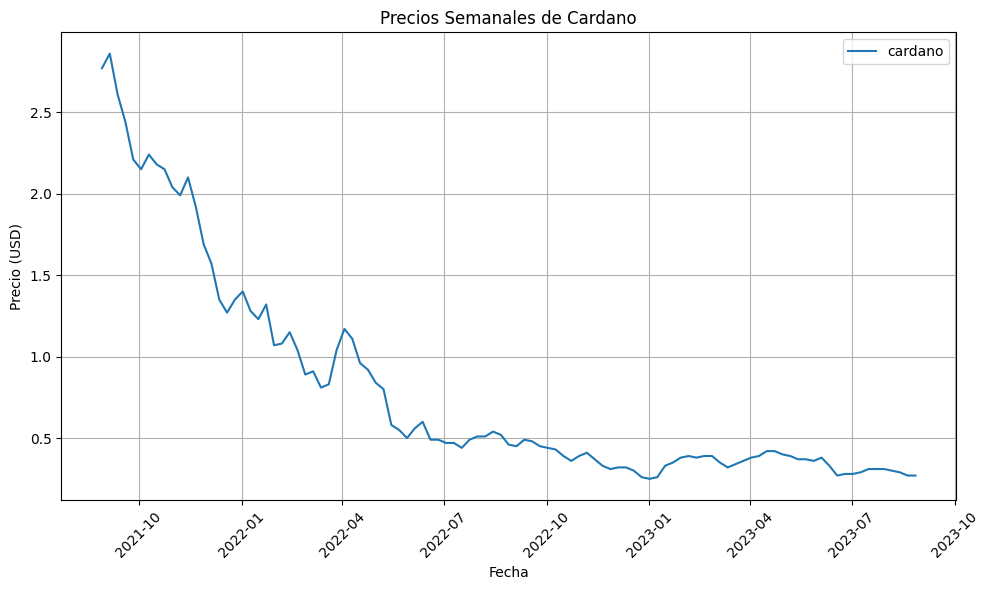

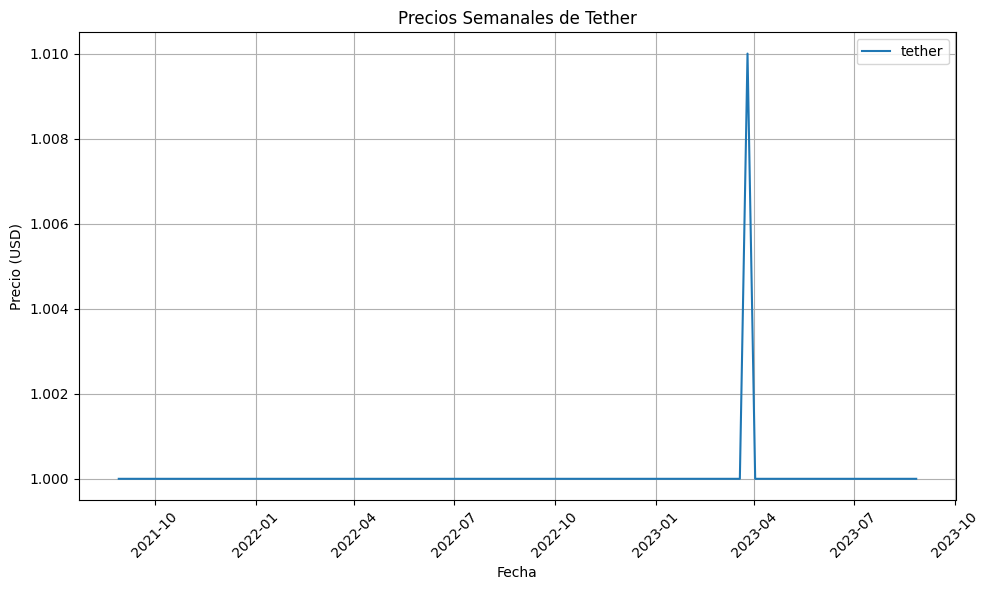

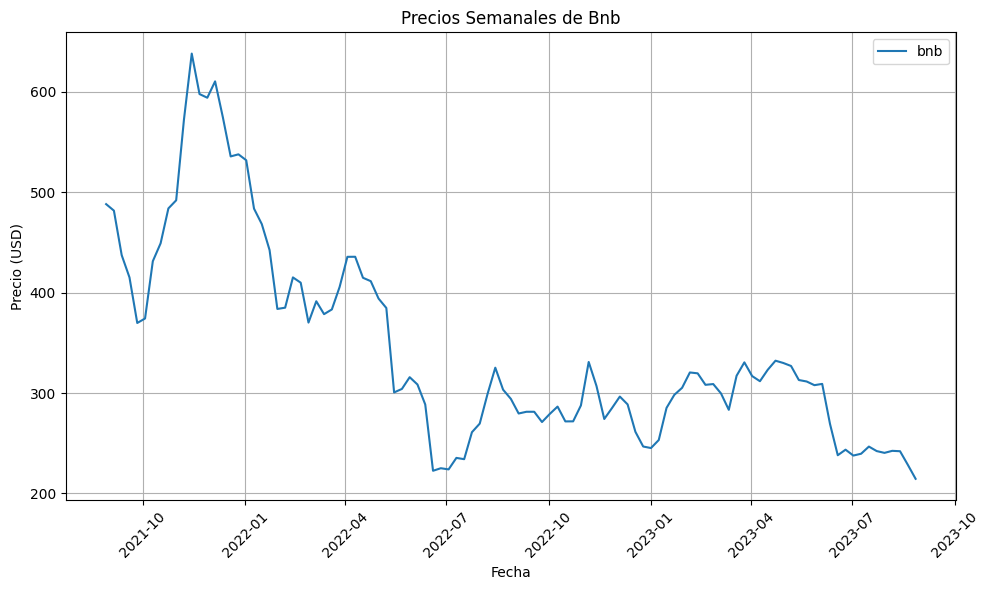

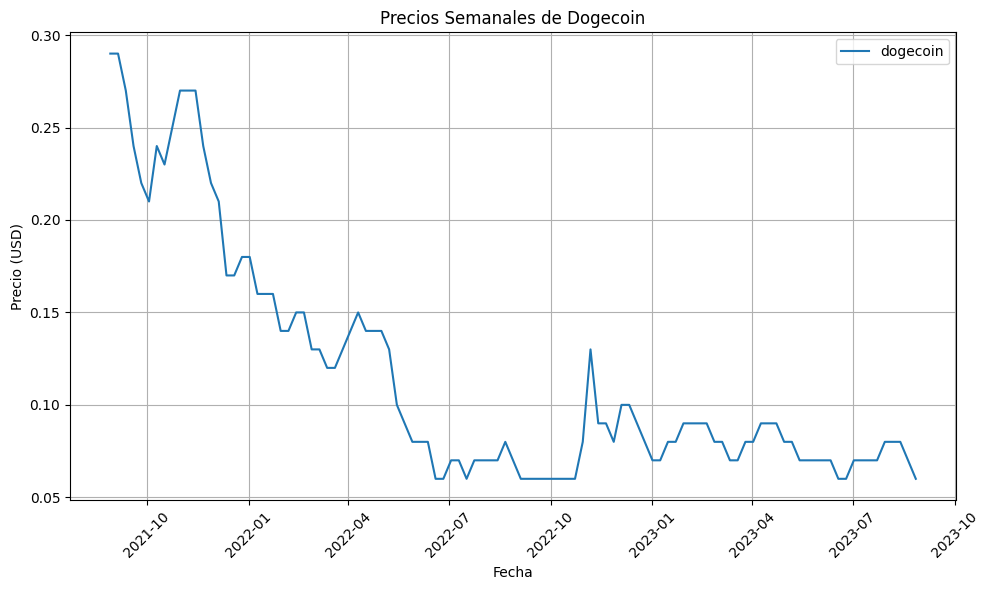

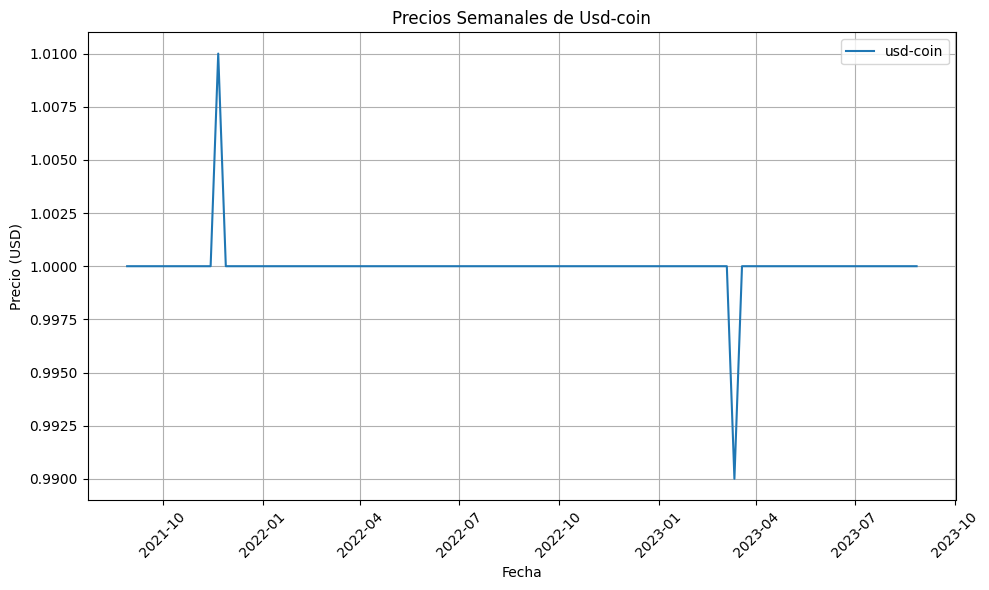

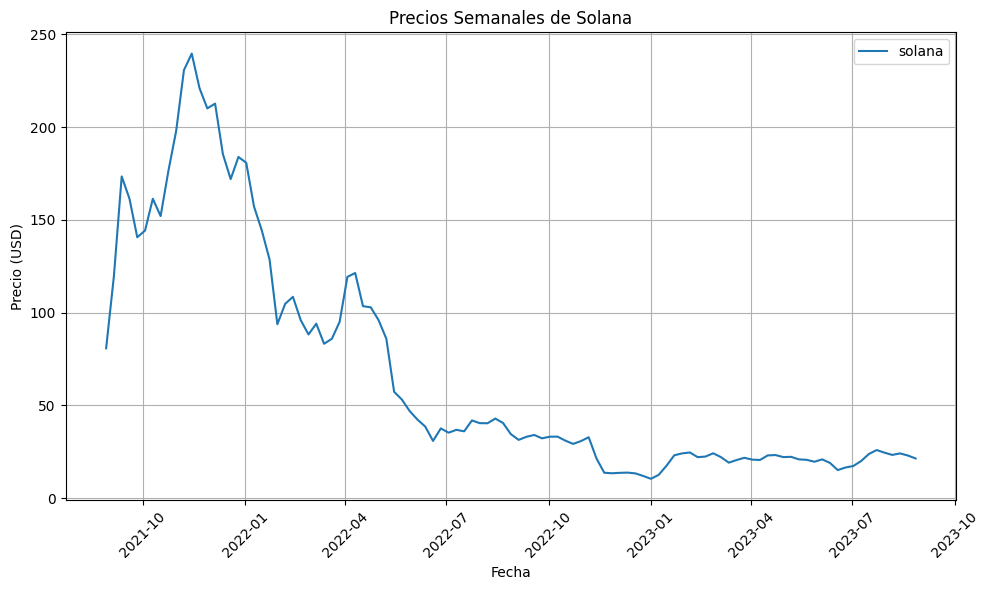

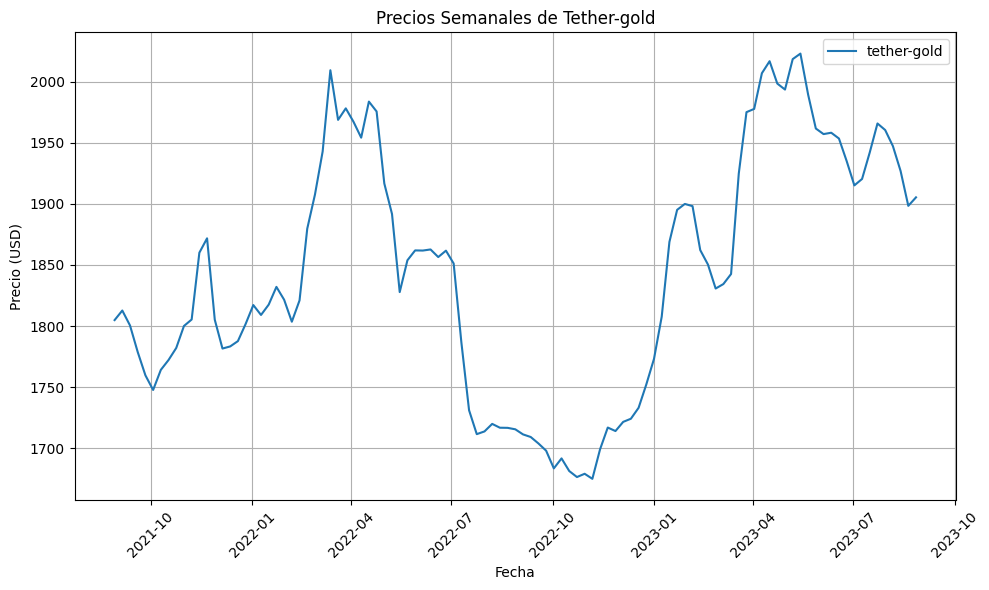

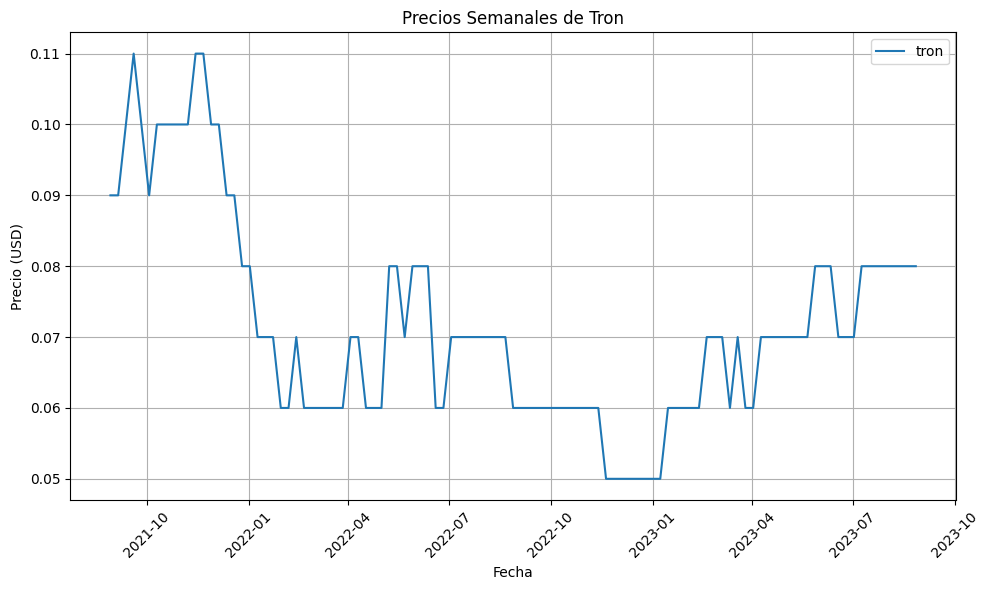

In [8]:
import requests
import pandas as pd

def crear_dataframe(url, currency):
    response = requests.get(url)
    data = response.json()

    if 'prices' in data:
        prices_data = data['prices']
    else:
        print(f"No se encontraron datos de precios para {currency}")
        return None

    # Crear DataFrame con los precios semanales
    df = pd.DataFrame(prices_data, columns=['timestamp', currency])

    # Convertir el timestamp a datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    # Redondear a 2 decimales
    df.set_index('timestamp', inplace=True)

    # Agrupar los precios semanalmente y calcular el precio promedio de cada uno
    df_semanal = df.resample('W').mean()

    return df_semanal

# URLs de las criptomonedas seleccionadas
cryptos = [
    ('ethereum', 'https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days=730'),
    ('bitcoin', 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=730'),
    ('cardano', 'https://api.coingecko.com/api/v3/coins/cardano/market_chart?vs_currency=usd&days=730'),
    ('tether', 'https://api.coingecko.com/api/v3/coins/tether/market_chart?vs_currency=usd&days=730'),
    ('bnb', 'https://api.coingecko.com/api/v3/coins/binancecoin/market_chart?vs_currency=usd&days=730'),
    ('dogecoin', 'https://api.coingecko.com/api/v3/coins/dogecoin/market_chart?vs_currency=usd&days=730'),
    ('usd-coin', 'https://api.coingecko.com/api/v3/coins/usd-coin/market_chart?vs_currency=usd&days=730'),
    ('solana', 'https://api.coingecko.com/api/v3/coins/solana/market_chart?vs_currency=usd&days=730'),
    ('tether-gold', 'https://api.coingecko.com/api/v3/coins/tether-gold/market_chart?vs_currency=usd&days=730'),
    ('tron', 'https://api.coingecko.com/api/v3/coins/tron/market_chart?vs_currency=usd&days=730')
]

# Crear un DataFrame con todas las monedas combinadas
df_combinadoS = pd.DataFrame()

for currency, url in cryptos:
    df = crear_dataframe(url, currency)
    if df is not None:
        df_combinadoS = pd.concat([df_combinadoS, df], axis=1)

# Redondear a 2 decimales
df_combinadoS = df_combinadoS.round(2)

# Guardar el Df en un CSV
df_combinadoS.to_csv('Precios_Semanales.csv')

print(df_combinadoS)

import matplotlib.pyplot as plt

# Iterar a través de las columnas del DataFrame combinado
for crypto in df_combinadoS.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df_combinadoS.index, df_combinadoS[crypto], label=crypto)
    plt.title(f"Precios Semanales de {crypto.capitalize()}")
    plt.xlabel("Fecha")
    plt.ylabel("Precio (USD)")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Guardar el gráfico como imagen (opcional)
    plt.savefig(f'grafico_{crypto}.png')
    
    # Mostrar el gráfico
    plt.show()

            ethereum   bitcoin  cardano  tether     bnb  dogecoin  usd-coin  \
timestamp                                                                     
2022-08-28   1590.28  20838.69     0.45    1.00  288.87      0.07      1.00   
2022-09-04   1541.67  19958.14     0.45    1.00  279.60      0.06      1.00   
2022-09-11   1646.27  20042.23     0.49    1.00  281.32      0.06      1.00   
2022-09-18   1579.35  20588.37     0.48    1.00  281.33      0.06      1.00   
2022-09-25   1324.46  19159.04     0.45    1.00  271.11      0.06      1.00   
2022-10-02   1325.22  19277.92     0.44    1.00  279.18      0.06      1.00   
2022-10-09   1329.92  19716.76     0.43    1.00  286.49      0.06      1.00   
2022-10-16   1292.71  19208.19     0.39    1.00  271.74      0.06      1.00   
2022-10-23   1304.64  19245.91     0.36    1.00  271.79      0.06      1.00   
2022-10-30   1489.71  20204.50     0.39    1.00  287.63      0.08      1.00   
2022-11-06   1581.02  20630.76     0.41    1.00  330

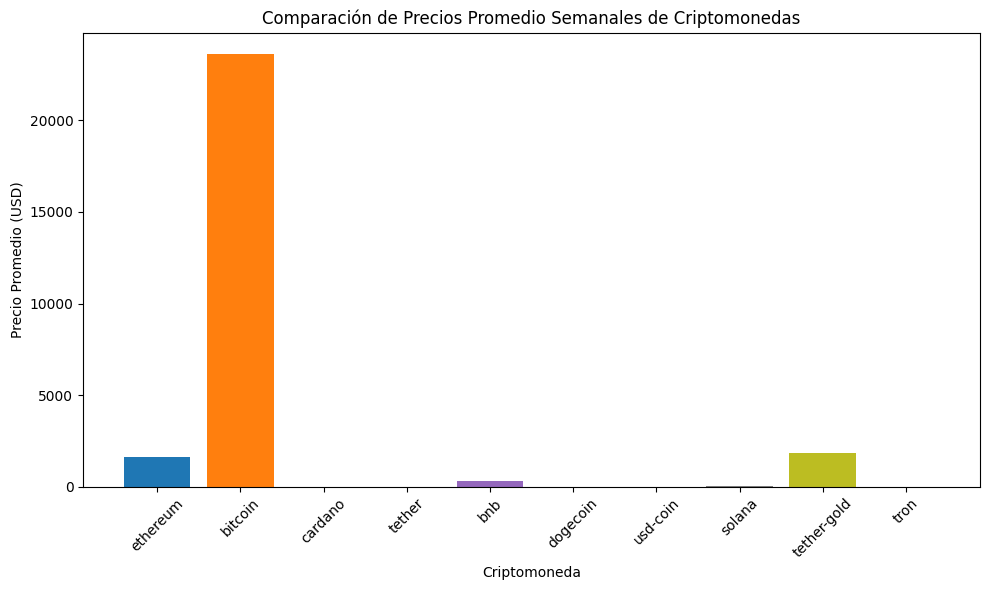

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

DAYS = 365

def crear_dataframe(url, currency):
    response = requests.get(url)
    data = response.json()

    if 'prices' in data:
        prices_data = data['prices']
    else:
        print(f"No se encontraron datos de precios para {currency}")
        return None

    df = pd.DataFrame(prices_data, columns=['timestamp', currency])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    
    df_semanal = df.resample('W').mean()
    return df_semanal

def obtener_precios_criptomonedas(crypto_list):
    df_combinadoS = pd.DataFrame()

    for crypto in crypto_list:
        currency = crypto['currency']
        url = crypto['url']
        df = crear_dataframe(url, currency)
        if df is not None:
            df_combinadoS = pd.concat([df_combinadoS, df], axis=1)

    df_combinadoS = df_combinadoS.round(2)
    df_combinadoS.to_csv('Precios_Semanales.csv')

    return df_combinadoS

crypto_list = [
    {'currency': 'ethereum', 'url': f'https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days={DAYS}'},
    {'currency': 'bitcoin', 'url': f'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days={DAYS}'},
    {'currency': 'cardano', 'url': f'https://api.coingecko.com/api/v3/coins/cardano/market_chart?vs_currency=usd&days={DAYS}'},
    {'currency': 'tether', 'url': f'https://api.coingecko.com/api/v3/coins/tether/market_chart?vs_currency=usd&days={DAYS}'},
    {'currency': 'bnb', 'url': f'https://api.coingecko.com/api/v3/coins/binancecoin/market_chart?vs_currency=usd&days={DAYS}'},
    {'currency': 'dogecoin', 'url': f'https://api.coingecko.com/api/v3/coins/dogecoin/market_chart?vs_currency=usd&days={DAYS}'},
    {'currency': 'usd-coin', 'url': f'https://api.coingecko.com/api/v3/coins/usd-coin/market_chart?vs_currency=usd&days={DAYS}'},
    {'currency': 'solana', 'url': f'https://api.coingecko.com/api/v3/coins/solana/market_chart?vs_currency=usd&days={DAYS}'},
    {'currency': 'tether-gold', 'url': f'https://api.coingecko.com/api/v3/coins/tether-gold/market_chart?vs_currency=usd&days={DAYS}'},
    {'currency': 'tron', 'url': f'https://api.coingecko.com/api/v3/coins/tron/market_chart?vs_currency=usd&days={DAYS}'}
]

if __name__ == "__main__":
    precios_combinados = obtener_precios_criptomonedas(crypto_list)
    print(precios_combinados)

    # Gráfico de barras para comparar precios promedio semanales
    plt.figure(figsize=(10, 6))  # Tamaño de la figura

    for crypto in crypto_list:
        currency = crypto['currency']
        plt.bar(currency, precios_combinados[currency].mean())

    plt.title('Comparación de Precios Promedio Semanales de Criptomonedas')
    plt.xlabel('Criptomoneda')
    plt.ylabel('Precio Promedio (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.savefig('grafico_comparacion.png')  # Guardar el gráfico como imagen
    plt.show()


In [ ]:
#Grafico la evolución histórica sin tomar en cuenta Bitcoin, tomándolo como outlier. En este gráfico se puede sacar como conclusion
#para Ethereum BNB y Solana pueden ser una buena inversión a corto plazo diferenciándose en que dan menores ganancias pero más 
# estabilidad a lo largo del período graficado.

            ethereum  cardano  tether     bnb  dogecoin  usd-coin  solana  \
timestamp                                                                   
2022-08-28   1590.28     0.45    1.00  288.87      0.07      1.00   33.44   
2022-09-04   1541.67     0.45    1.00  279.60      0.06      1.00   31.42   
2022-09-11   1646.27     0.49    1.00  281.32      0.06      1.00   33.07   
2022-09-18   1579.35     0.48    1.00  281.33      0.06      1.00   34.06   
2022-09-25   1324.46     0.45    1.00  271.11      0.06      1.00   32.25   
2022-10-02   1325.22     0.44    1.00  279.18      0.06      1.00   33.13   
2022-10-09   1329.92     0.43    1.00  286.49      0.06      1.00   33.17   
2022-10-16   1292.71     0.39    1.00  271.74      0.06      1.00   31.00   
2022-10-23   1304.64     0.36    1.00  271.79      0.06      1.00   29.24   
2022-10-30   1489.71     0.39    1.00  287.63      0.08      1.00   30.76   
2022-11-06   1581.02     0.41    1.00  330.87      0.13      1.00   32.84   

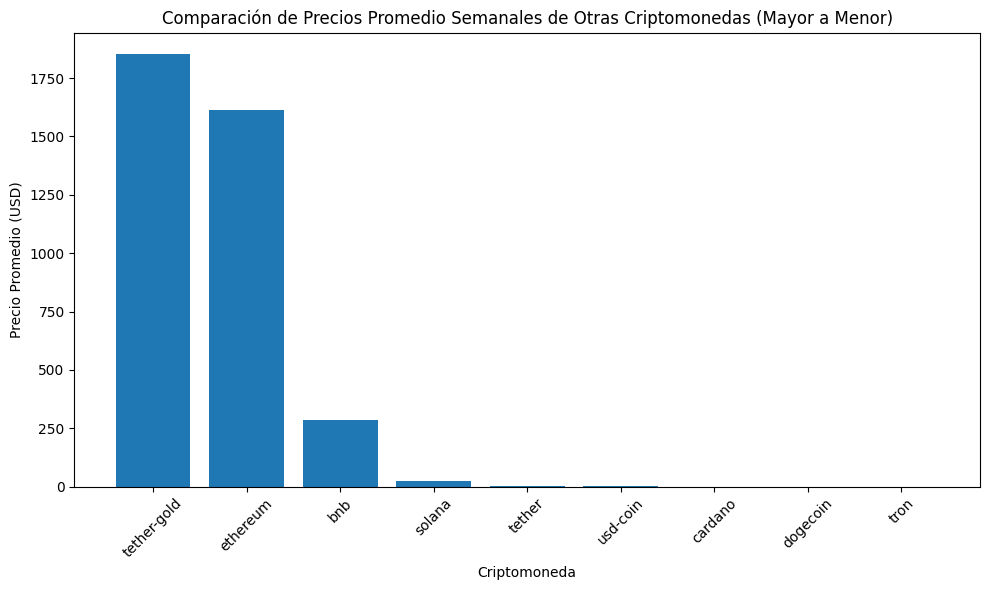

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

DAYS = 365

def crear_dataframe(url, currency):
    response = requests.get(url)
    data = response.json()

    if 'prices' in data:
        prices_data = data['prices']
    else:
        print(f"No se encontraron datos de precios para {currency}")
        return None

    df = pd.DataFrame(prices_data, columns=['timestamp', currency])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    
    df_semanal = df.resample('W').mean()
    return df_semanal

def obtener_precios_otras_criptomonedas(crypto_list):
    df_combinadoS = pd.DataFrame()

    for crypto in crypto_list:
        currency = crypto['currency']
        url = crypto['url']
        df = crear_dataframe(url, currency)
        if df is not None:
            df_combinadoS = pd.concat([df_combinadoS, df], axis=1)

    df_combinadoS = df_combinadoS.round(2)
    df_combinadoS.to_csv('Precios_Otras_Criptomonedas.csv')

    return df_combinadoS

crypto_list = [
    {'currency': 'ethereum', 'url': f'https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days={DAYS}'},
    {'currency': 'cardano', 'url': f'https://api.coingecko.com/api/v3/coins/cardano/market_chart?vs_currency=usd&days={DAYS}'},
    {'currency': 'tether', 'url': f'https://api.coingecko.com/api/v3/coins/tether/market_chart?vs_currency=usd&days={DAYS}'},
    {'currency': 'bnb', 'url': f'https://api.coingecko.com/api/v3/coins/binancecoin/market_chart?vs_currency=usd&days={DAYS}'},
    {'currency': 'dogecoin', 'url': f'https://api.coingecko.com/api/v3/coins/dogecoin/market_chart?vs_currency=usd&days={DAYS}'},
    {'currency': 'usd-coin', 'url': f'https://api.coingecko.com/api/v3/coins/usd-coin/market_chart?vs_currency=usd&days={DAYS}'},
    {'currency': 'solana', 'url': f'https://api.coingecko.com/api/v3/coins/solana/market_chart?vs_currency=usd&days={DAYS}'},
    {'currency': 'tether-gold', 'url': f'https://api.coingecko.com/api/v3/coins/tether-gold/market_chart?vs_currency=usd&days={DAYS}'},
    {'currency': 'tron', 'url': f'https://api.coingecko.com/api/v3/coins/tron/market_chart?vs_currency=usd&days={DAYS}'}
]

if __name__ == "__main__":
    precios_combinados = obtener_precios_otras_criptomonedas(crypto_list)
    print(precios_combinados)

    if precios_combinados is not None:
        precios_promedio = precios_combinados.mean()
        criptomonedas_ordenadas = precios_promedio.sort_values(ascending=False)

        plt.figure(figsize=(10, 6))  # Tamaño de la figura

        plt.bar(criptomonedas_ordenadas.index, criptomonedas_ordenadas.values)

        plt.title('Comparación de Precios Promedio Semanales de Otras Criptomonedas (Mayor a Menor)')
        plt.xlabel('Criptomoneda')
        plt.ylabel('Precio Promedio (USD)')
        plt.xticks(rotation=45)
        plt.tight_layout()

        plt.savefig('grafico_comparacion_otras_criptomonedas.png')  # Guardar el gráfico como imagen
        plt.show()

In [ ]:
#Grafico y comparo la evolución histórica de los precios, enfocándome de bitcoin. Cómo podemos apreciar en el gráfico siguiente, esta criptomoneda
#decrece en valor durante los ultimos 3 años haciendo que sea inconveniente sostener una inversión a largo plazo. Sin embargo, si tomamos períodos
#semanales o mensuales, puede representar una buena oportunidad para inversión y generar ganancias

             bitcoin
timestamp           
2022-08-28  20838.69
2022-09-04  19958.14
2022-09-11  20042.23
2022-09-18  20588.37
2022-09-25  19159.04
2022-10-02  19277.92
2022-10-09  19716.76
2022-10-16  19208.19
2022-10-23  19245.91
2022-10-30  20204.50
2022-11-06  20630.76
2022-11-13  18183.24
2022-11-20  16672.60
2022-11-27  16353.53
2022-12-04  16755.83
2022-12-11  17081.49
2022-12-18  17234.59
2022-12-25  16763.77
2023-01-01  16681.73
2023-01-08  16795.19
2023-01-15  18504.44
2023-01-22  21495.82
2023-01-29  22948.83
2023-02-05  23404.56
2023-02-12  22473.66
2023-02-19  23306.31
2023-02-26  23987.87
2023-03-05  23147.03
2023-03-12  21408.57
2023-03-19  25034.29
2023-03-26  27936.42
2023-04-02  27996.28
2023-04-09  28052.86
2023-04-16  29908.55
2023-04-23  28912.68
2023-04-30  28551.87
2023-05-07  28912.11
2023-05-14  27452.27
2023-05-21  27053.34
2023-05-28  26749.61
2023-06-04  27423.95
2023-06-11  26500.93
2023-06-18  25885.70
2023-06-25  28949.69
2023-07-02  30435.47
2023-07-09  3

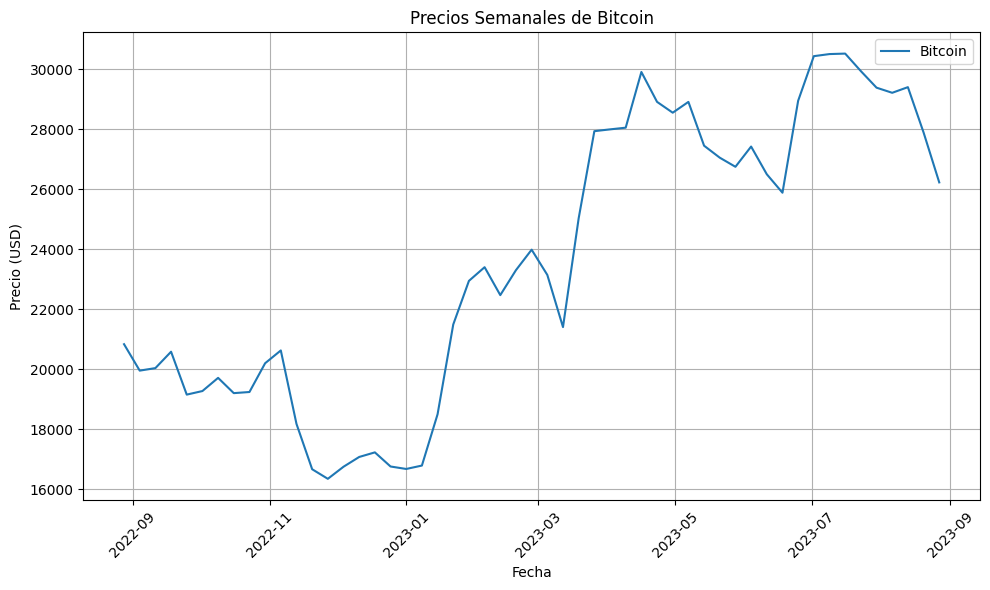

In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

DAYS = 365

def crear_dataframe(url, currency):
    response = requests.get(url)
    data = response.json()

    if 'prices' in data:
        prices_data = data['prices']
    else:
        print(f"No se encontraron datos de precios para {currency}")
        return None

    df = pd.DataFrame(prices_data, columns=['timestamp', currency])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    
    df_semanal = df.resample('W').mean()
    return df_semanal

def obtener_precios_bitcoin():
    bitcoin_url = f'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days={DAYS}'
    df_bitcoin = crear_dataframe(bitcoin_url, 'bitcoin')

    if df_bitcoin is not None:
        df_bitcoin = df_bitcoin.round(2)
        df_bitcoin.to_csv('Precios_Bitcoin.csv')
    
    return df_bitcoin

if __name__ == "__main__":
    precios_bitcoin = obtener_precios_bitcoin()
    print(precios_bitcoin)

    if precios_bitcoin is not None:
        plt.figure(figsize=(10, 6))  # Tamaño de la figura

        plt.plot(precios_bitcoin.index, precios_bitcoin['bitcoin'], label='Bitcoin')

        plt.title('Precios Semanales de Bitcoin')
        plt.xlabel('Fecha')
        plt.ylabel('Precio (USD)')
        plt.legend()
        plt.grid()
        plt.xticks(rotation=45)
        plt.tight_layout()

        plt.savefig('grafico_precios_bitcoin.png')  # Guardar el gráfico como imagen
        plt.show()

In [ ]:
# Volumen de Criptomonedas en las Últimas 24 Horas. Podemos observar como Tether, Bitcoin, Ethereum y Usd-Coin destacan por sobre las demás. 
# Un alto volumen en una criptomoneda durante un período anual generalmente indica una actividad comercial y de intercambio significativa en 
# esa criptomoneda a lo largo del año. El volumen se refiere a la cantidad total de unidades de una criptomoneda que se han comprado y vendido 
# en los mercados durante un período de tiempo específico, en este caso, durante un año completo.

                      usd    24h_volume
tether           0.999957  1.943232e+10
bitcoin      26294.000000  1.604797e+10
ethereum      1661.410000  8.599755e+09
usd-coin         0.999567  5.369757e+09
binancecoin    218.820000  5.147443e+08
solana          21.530000  4.034781e+08
dogecoin         0.063084  2.484757e+08
tron             0.077067  2.057971e+08
cardano          0.265380  1.721757e+08
tether-gold   1916.460000  3.739898e+06


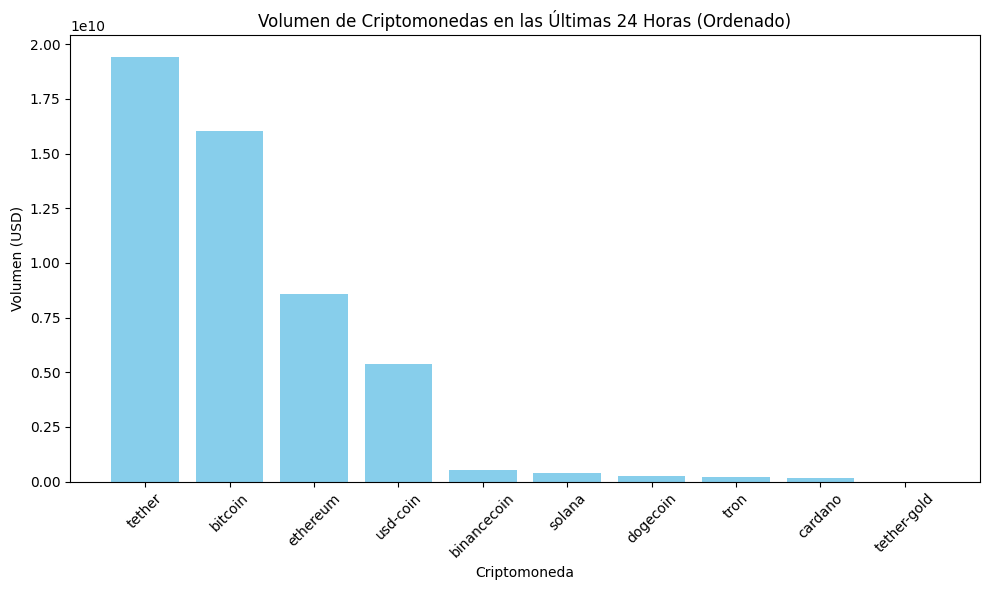

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI

# Crear una instancia de CoinGeckoAPI class
cg = CoinGeckoAPI()

# Obtener el volumen de las últimas 24 horas de las criptomonedas
cryptos = ['ethereum', 'bitcoin', 'cardano', 'tether', 'binancecoin', 'dogecoin', 'usd-coin', 'solana', 'tether-gold', 'tron']
vs_currency = 'usd'

data = cg.get_price(ids=cryptos, vs_currencies=vs_currency, include_24hr_vol=True)

# Convertir el diccionario a un df de Pandas
df = pd.DataFrame.from_dict(data, orient='index')
df.rename(columns={f'{vs_currency}_24h_vol': '24h_volume'}, inplace=True)

# Ordenar de mayor a menor según el volumen
df_sorted = df.sort_values(by='24h_volume', ascending=False)

# Guardar el Df ordenado en un CSV
df_sorted.to_csv('Volumen_Actual_Ordenado.csv')

# Mostrar el dataframe ordenado
print(df_sorted)

# Gráfico de barras para representar el volumen ordenado
plt.figure(figsize=(10, 6))
plt.bar(df_sorted.index, df_sorted['24h_volume'], color='skyblue')
plt.title('Volumen de Criptomonedas en las Últimas 24 Horas (Ordenado)')
plt.xlabel('Criptomoneda')
plt.ylabel('Volumen (USD)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('grafico_volumen_ordenado.png')  # Guardar el gráfico como imagen
plt.show()

In [ ]:
##Obtener el volumen de las criptomenedas de todo el 2022

In [ ]:
# Obtenemos el suministro circulante y total. Si tenemos un alto rendimiento en ambos casos nos estaría mostrando  que hay muchas unidades de la 
# criptomoneda disponibles en el mercado y que hay una posibilidad de que su valor por unidad sea menor en comparación con las criptomonedas con 
# suministros más bajos. Dogecoin es la moneda con mejor rendimiento seguida por Ethereum y Tether.

                        ethereum     bitcoin       cardano        tether  \
circulating_supply  1.202142e+08  19466675.0  3.504502e+10  8.284578e+10   
total_supply        1.202142e+08  21000000.0  4.500000e+10  8.284578e+10   

                    binancecoin      dogecoin      usd-coin        solana  \
circulating_supply  153856150.0  1.407217e+11  2.593475e+10  4.077708e+08   
total_supply        153856150.0  1.407215e+11  2.593427e+10  5.556409e+08   

                    tether-gold          tron  
circulating_supply    246524.33  8.938756e+10  
total_supply          246524.33  8.938791e+10  


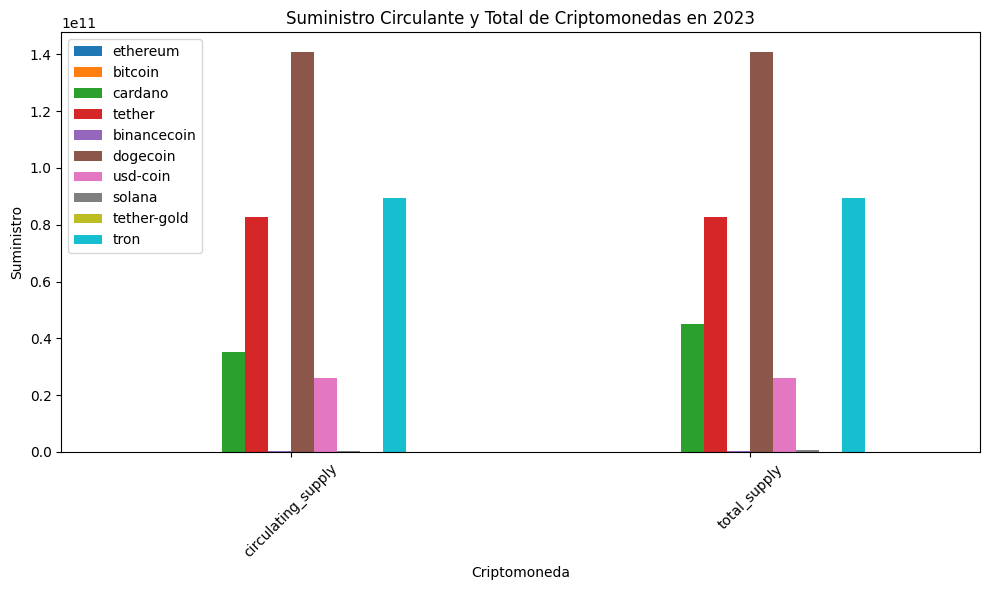

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI

# Crear una instancia de la clase CoinGeckoAPI
cg = CoinGeckoAPI()

# Definir el rango de fechas del año 2023
start_date = '01-01-2023'
end_date = '31-12-2023'

# Crear un diccionario vacío para almacenar los datos
data = {}

# Iterar sobre las criptomonedas deseadas
for coin in ['ethereum', 'bitcoin', 'cardano', 'tether', 'binancecoin', 'dogecoin', 'usd-coin', 'solana', 'tether-gold', 'tron']:
    # Obtener el suministro circulante y el suministro total de la criptomoneda
    supply = cg.get_coin_by_id(id=coin, localization=False, tickers=False, market_data=True, community_data=False, developer_data=False, sparkline=False)
    # Extraer los datos del suministro y convertirlos en una serie de pandas
    supply = pd.Series(data=[supply['market_data']['circulating_supply'], supply['market_data']['total_supply']], index=['circulating_supply', 'total_supply'])
    # Renombrar la serie con el nombre de la criptomoneda
    supply.name = coin
    # Añadir la serie al diccionario
    data[coin] = supply

# Convertir el diccionario en un dataframe de pandas
Volumen2023 = pd.DataFrame.from_dict(data)

# Convertir los valores a tipo numérico
Volumen2023 = Volumen2023.apply(pd.to_numeric, errors='coerce')

# Guardar el Df en un CSV
Volumen2023.to_csv('Volumen_2023.csv')

# Mostrar el dataframe
print(Volumen2023)

# Gráfico de barras agrupadas para representar el suministro circulante y total
Volumen2023.plot(kind='bar', figsize=(10, 6))
plt.title('Suministro Circulante y Total de Criptomonedas en 2023')
plt.xlabel('Criptomoneda')
plt.ylabel('Suministro')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('grafico_suministro_2023.png')  # Guardar el gráfico como imagen
plt.show()


In [ ]:
# Obtener la capitalización del mercado de las criptomonedas en dólares estadounidenses

In [11]:
import pandas as pd
from pycoingecko import CoinGeckoAPI

# Crear una instancia de la clase CoinGeckoAPI
cg = CoinGeckoAPI()

# Lista de criptomonedas deseadas
cryptos = ['ethereum', 'bitcoin', 'cardano', 'tether', 'binancecoin', 'dogecoin', 'usd-coin', 'solana', 'tether-gold', 'tron']

# Obtener la capitalización del mercado de las criptomonedas en dólares estadounidenses
data = cg.get_price(ids=cryptos, vs_currencies='usd', include_market_cap=True)

# Convertir el diccionario en un dataframe de pandas
df = pd.DataFrame.from_dict(data, orient='index')

# Formatear los valores de capitalización de mercado en notación decimal estándar
df['usd_market_cap'] = df['usd_market_cap'].apply('{:,.2f}'.format)

# Renombrar las columnas para hacerlas más legibles
df.rename(columns={'usd_market_cap': 'Market Cap (USD)'}, inplace=True)

# Guardar el DataFrame en un archivo CSV
df.to_csv('capitalizacion_mercado.csv')

# Mostrar el DataFrame
print(df)

                      usd    Market Cap (USD)
binancecoin    209.100000   32,193,876,663.22
bitcoin      26048.000000  507,015,711,061.27
cardano          0.259590    9,106,582,234.57
dogecoin         0.063051    8,873,318,866.87
ethereum      1663.560000  200,034,453,015.35
solana          20.930000    8,539,192,782.35
tether           0.999433   82,799,501,314.03
tether-gold   1920.460000      473,354,593.98
tron             0.074907    6,698,268,099.56
usd-coin         1.001000   25,942,502,157.48


In [ ]:
# Obtenemos y graficamos el precio y la capitalización del mercado de cada criptomoneda seleccionada.Podemos observar que de acuerdo al valor 
# y la capitalización del mercado, Bitcoin es la que mejor funciona, seguida por Ethereum y Tether. También nos muestra la estrecha relación 
# que hay entre las dos variables.

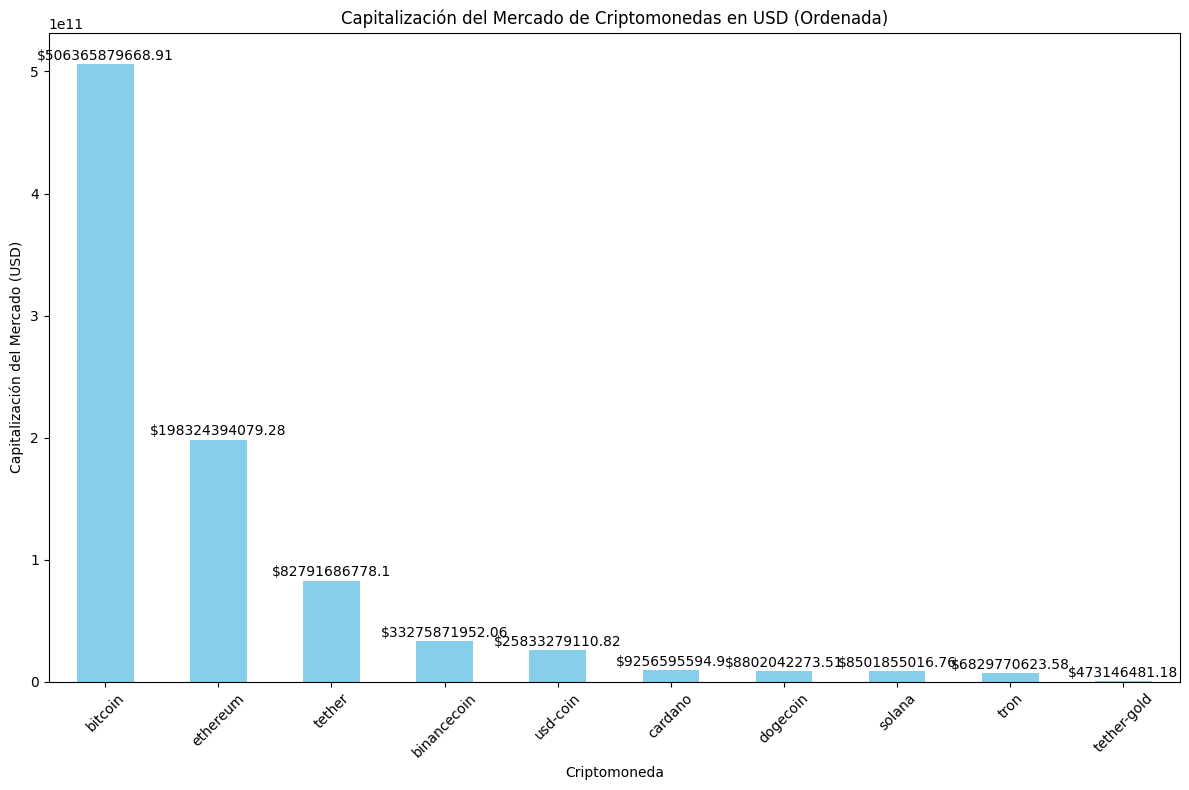

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI

# Crear una instancia de la clase CoinGeckoAPI
cg = CoinGeckoAPI()

# Lista de criptomonedas deseadas
cryptos = ['ethereum', 'bitcoin', 'cardano', 'tether', 'binancecoin', 'dogecoin', 'usd-coin', 'solana', 'tether-gold', 'tron']

# Obtener la capitalización del mercado de las criptomonedas en dólares estadounidenses
data = cg.get_price(ids=cryptos, vs_currencies='usd', include_market_cap=True)

# Convertir el diccionario en un dataframe de pandas
df = pd.DataFrame.from_dict(data, orient='index')

# Formatear los valores de capitalización de mercado en notación decimal estándar
df['usd_market_cap'] = df['usd_market_cap'].apply('{:,.2f}'.format)

# Renombrar las columnas para hacerlas más legibles
df.rename(columns={'usd_market_cap': 'Market Cap (USD)'}, inplace=True)

# Convertir los valores de capitalización de mercado a tipo numérico para ordenar
df['Market Cap (USD)'] = df['Market Cap (USD)'].str.replace(',', '').astype(float)

# Ordenar el DataFrame de mayor a menor según la capitalización del mercado
df_sorted = df.sort_values(by='Market Cap (USD)', ascending=False)

# Crear un gráfico de barras para representar la capitalización del mercado ordenada
plt.figure(figsize=(12, 8))
ax = df_sorted['Market Cap (USD)'].plot(kind='bar', color='skyblue')
plt.title('Capitalización del Mercado de Criptomonedas en USD (Ordenada)')
plt.xlabel('Criptomoneda')
plt.ylabel('Capitalización del Mercado (USD)')
plt.xticks(rotation=45)
plt.tight_layout()

# Etiquetas de valor en las barras
for i, v in enumerate(df_sorted['Market Cap (USD)']):
    ax.text(i, v + 1000000000, '$' + str(v), ha='center', va='bottom', fontsize=10)

plt.savefig('grafico_capitalizacion_mercado_ordenado.png')  # Guardar el gráfico como imagen
plt.show()

In [ ]:
#En este KPI obtenemos un Dataframe general y graficamos 3 campos relativos a los precios. Podemos observar una alta variación de precios en 
# los tres campos de todas las monedas, esceptuando Tether-Gold, Usd-Coin y Tether que se mantienen estables a lo largo de los períodos 
# analizados. Otro punto a destacar es el rendimiento en 7 días de Tron y Tether-Gold, que muestran un leve crecimiento, a diferencia de todas 
# las demás 

KPIs para Ethereum (ethereum):
------------------------------

KPIs para Bitcoin (bitcoin):
------------------------------

KPIs para Cardano (cardano):
------------------------------

KPIs para Tether (tether):
------------------------------

KPIs para Bnb (binancecoin):
------------------------------

KPIs para Dogecoin (dogecoin):
------------------------------

KPIs para Usd-coin (usd-coin):
------------------------------

KPIs para Solana (solana):
------------------------------

KPIs para Tether-gold (tether-gold):
------------------------------

KPIs para Tron (tron):
------------------------------



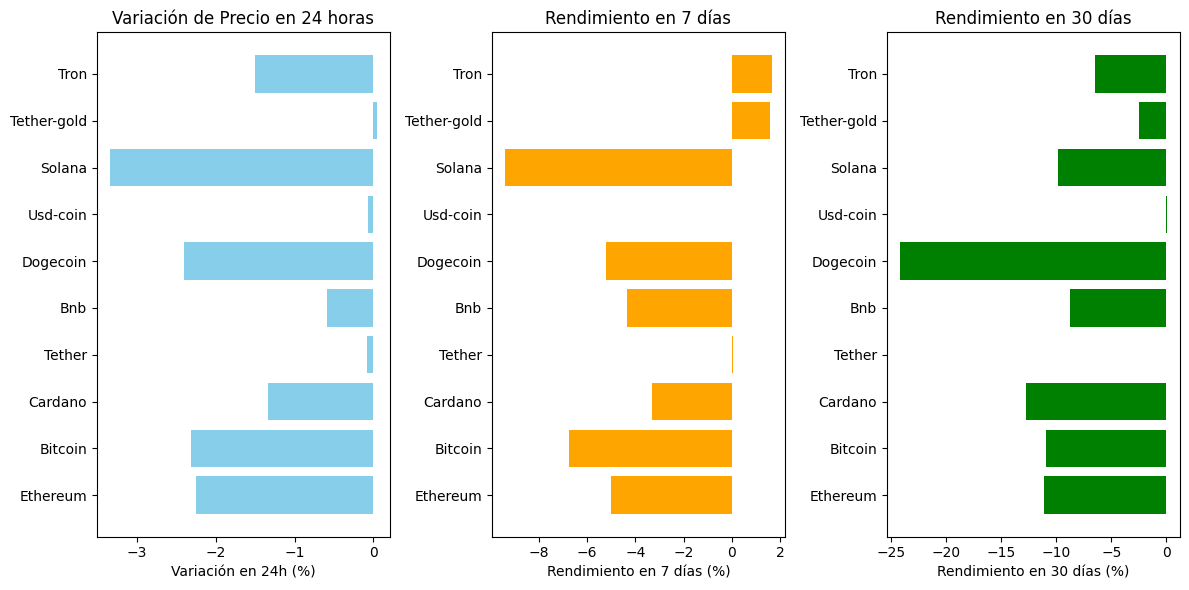

In [3]:

# Lista de criptomonedas y sus identificadores en la API de CoinGecko
cryptos = [
    ('ethereum', 'ethereum'),
    ('bitcoin', 'bitcoin'),
    ('cardano', 'cardano'),
    ('tether', 'tether'),
    ('bnb', 'binancecoin'),
    ('dogecoin', 'dogecoin'),
    ('usd-coin', 'usd-coin'),
    ('solana', 'solana'),
    ('tether-gold', 'tether-gold'),
    ('tron', 'tron')
]

# Crear listas para almacenar los datos de KPIs
crypto_names = []
price_change_24h = []
price_change_7d = []
price_change_30d = []

# Obtener información para las criptomonedas y calcular KPIs
for crypto_name, crypto_id in cryptos:
    try:
        data = cg.get_coin_by_id(id=crypto_id)
        market_data = data['market_data']

        crypto_names.append(crypto_name.capitalize())
        price_change_24h.append(market_data['price_change_percentage_24h'])
        price_change_7d.append(market_data['price_change_percentage_7d'])
        price_change_30d.append(market_data['price_change_percentage_30d'])

        print(f"KPIs para {crypto_name.capitalize()} ({crypto_id}):")
        print("------------------------------")
        # Resto de los datos...
        print()
    except Exception as e:
        print(f"Error obteniendo información para {crypto_name.capitalize()}: {e}")

# Crear un DataFrame con los datos de KPIs
KPIGeneral = pd.DataFrame({
    'Criptomoneda': crypto_names,
    'Variación de precio en 24h': price_change_24h,
    'Rendimiento en 7 días': price_change_7d,
    'Rendimiento en 30 días': price_change_30d
})

# Guardar el DataFrame en un archivo CSV
KPIGeneral.to_csv('KPIGeneral.csv', index=False)

# Crear gráficos de barras para las tres métricas
plt.figure(figsize=(12, 6))

# Gráfico de Variación de Precio en 24 horas
plt.subplot(1, 3, 1)
plt.barh(KPIGeneral['Criptomoneda'], KPIGeneral['Variación de precio en 24h'], color='skyblue')
plt.xlabel('Variación en 24h (%)')
plt.title('Variación de Precio en 24 horas')

# Gráfico de Rendimiento en 7 días
plt.subplot(1, 3, 2)
plt.barh(KPIGeneral['Criptomoneda'], KPIGeneral['Rendimiento en 7 días'], color='orange')
plt.xlabel('Rendimiento en 7 días (%)')
plt.title('Rendimiento en 7 días')

# Gráfico de Rendimiento en 30 días
plt.subplot(1, 3, 3)
plt.barh(KPIGeneral['Criptomoneda'], KPIGeneral['Rendimiento en 30 días'], color='green')
plt.xlabel('Rendimiento en 30 días (%)')
plt.title('Rendimiento en 30 días')

plt.tight_layout()
plt.show()

In [ ]:
#Obtenemos un KPI buscando la Capitalización del Mercado de cada criptomoneda. Una alta capitalización generalmente indica que la 
# criptomoneda es ampliamente aceptada y valorada. Algunas implicaciones puede significar un gran valor percibido, mayor confianza del público 
# mayor liquidez y mayor reconocimieto y adopción del mercado. Vemos que Bitcoin destaca ampliamente en este campo, seguido muy detras por 
# Ethereum y Tether, que de todas maneras, poseen un buen rendimiento. 

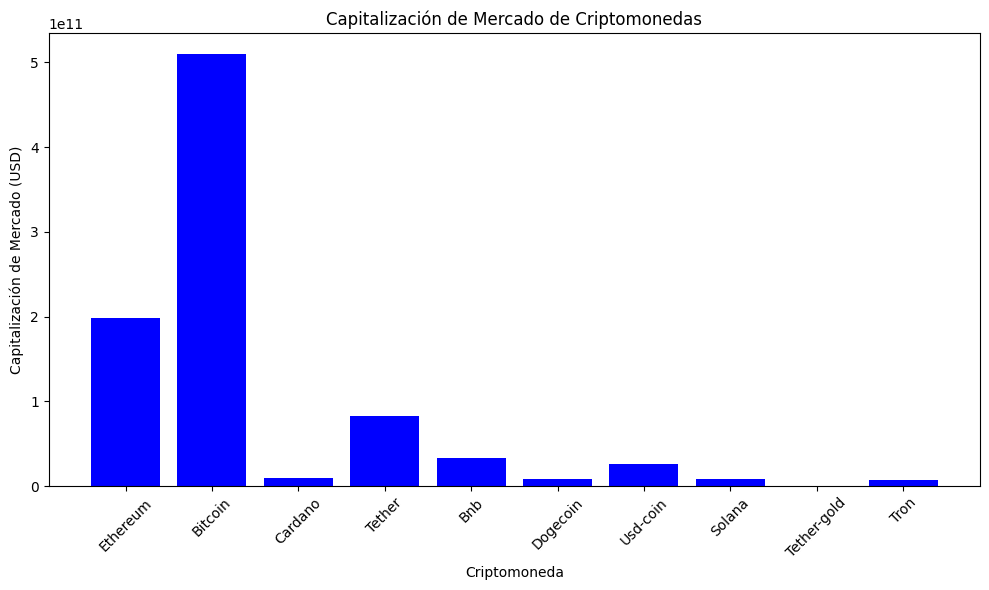

In [31]:
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI

# Crear una instancia de la clase CoinGeckoAPI
cg = CoinGeckoAPI()

# Lista de criptomonedas y sus identificadores en la API de CoinGecko
cryptos = [
    ('ethereum', 'ethereum'),
    ('bitcoin', 'bitcoin'),
    ('cardano', 'cardano'),
    ('tether', 'tether'),
    ('bnb', 'binancecoin'),
    ('dogecoin', 'dogecoin'),
    ('usd-coin', 'usd-coin'),
    ('solana', 'solana'),
    ('tether-gold', 'tether-gold'),
    ('tron', 'tron')
]

# Obtener información para las criptomonedas y calcular KPIs
capitalizaciones = []
nombres = []
for crypto_name, crypto_id in cryptos:
    try:
        data = cg.get_coin_by_id(id=crypto_id)
        market_data = data['market_data']
        capitalizacion = market_data['market_cap']['usd']
        capitalizaciones.append(capitalizacion)
        nombres.append(crypto_name.capitalize())
    except Exception as e:
        print(f"Error obteniendo información para {crypto_name.capitalize()}: {e}")

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(nombres, capitalizaciones, color='blue')
plt.title('Capitalización de Mercado de Criptomonedas')
plt.xlabel('Criptomoneda')
plt.ylabel('Capitalización de Mercado (USD)')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
# Armo un KPI extrayendo los datos relevantes de la capitalización de mercado, el volumen total de operaciones en 24 horas y el precio actual en 
# USD.
# Podemos observar que Bitcoin destaca por aobre todas las demas criptomonedas en estos campos, Ethereum posee un buen rendimiento exceptuando 
# el precio actual en USD, Tether poseé un alto volumen de operaciones pero una capitalización de mercado es baja y el precio es estable pero 
# bajo, esto podría indicar que los inversores no tienen una alta confianza en la moneda a largo plazo. Un precio estable pero bajo podría reflejar
# una falta de expectativas de crecimiento significativo en el futuro cercano. El resto de las criptomonedas muestran un comportamiento mas 
# estable pero mas bajo, en comparación. En caso de invertir, Bitcoin continua siendo una buena alternativa, como nos demuestra este gráfico y 
# Ethereum nos proporciona oportunidades futuras

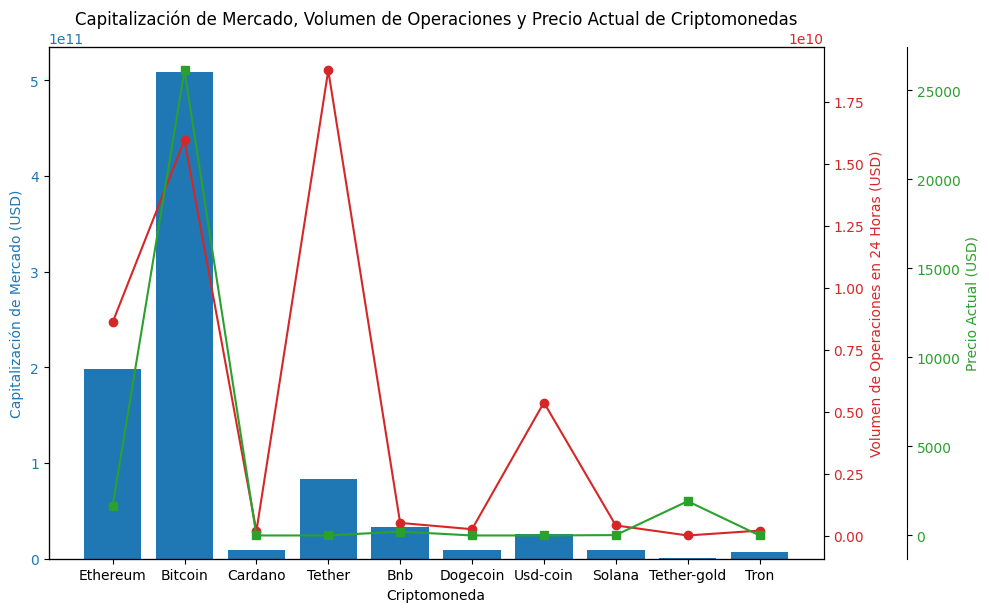

In [33]:
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI

# Crear una instancia de la clase CoinGeckoAPI
cg = CoinGeckoAPI()

# Lista de criptomonedas y sus identificadores en la API de CoinGecko
cryptos = [
    ('ethereum', 'ethereum'),
    ('bitcoin', 'bitcoin'),
    ('cardano', 'cardano'),
    ('tether', 'tether'),
    ('bnb', 'binancecoin'),
    ('dogecoin', 'dogecoin'),
    ('usd-coin', 'usd-coin'),
    ('solana', 'solana'),
    ('tether-gold', 'tether-gold'),
    ('tron', 'tron')
]

# Obtener información para las criptomonedas y calcular KPIs
capitalizaciones = []
volumenes = []
precios = []
nombres = []
for crypto_name, crypto_id in cryptos:
    try:
        data = cg.get_coin_by_id(id=crypto_id)
        market_data = data['market_data']
        capitalizacion = market_data['market_cap']['usd']
        volumen = market_data['total_volume']['usd']
        precio = market_data['current_price']['usd']
        capitalizaciones.append(capitalizacion)
        volumenes.append(volumen)
        precios.append(precio)
        nombres.append(crypto_name.capitalize())
    except Exception as e:
        print(f"Error obteniendo información para {crypto_name.capitalize()}: {e}")

# Crear un gráfico de barras con tres KPIs
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Criptomoneda')
ax1.set_ylabel('Capitalización de Mercado (USD)', color=color)
ax1.bar(nombres, capitalizaciones, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Volumen de Operaciones en 24 Horas (USD)', color=color)
ax2.plot(nombres, volumenes, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()
color = 'tab:green'
ax3.spines['right'].set_position(('outward', 60))  # Ajustar posición del tercer eje
ax3.set_ylabel('Precio Actual (USD)', color=color)
ax3.plot(nombres, precios, color=color, marker='s')
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Capitalización de Mercado, Volumen de Operaciones y Precio Actual de Criptomonedas')
plt.xticks(rotation=45)
plt.show()